### Algorithm: CNN-LSTM including data engineering
### Created: August 20, 2024
### Dataset : PEMS-SF
### Author: Edgar Acuna 


In [1]:
# cnn lstm model
from numpy import mean
from numpy import std, unique
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot


# load a single file as a numpy array
#def load_file(filepath):
#    dataframe = read_csv(filepath, header=None)
#    return dataframe.values

In [2]:
import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing

import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing

def load_data(dataset, split="Train"):
    if split=="Train":
        X, y= load_classification(dataset, split="Train")
    else:
        X, y = load_classification(dataset, split="Test")
    print(" Shape of X = ", X.shape)
    print(" Shape of y = ", y.shape)
    #Swap dimensions so features are the third dimension
    X = X.swapaxes(1, 2)
    print(" New shape of X = ", X.shape)
    #prepare y
    y = pd.DataFrame(y)
    enc = preprocessing.OneHotEncoder(dtype=int)
    enc.fit(y)
    y = enc.transform(y).toarray()
    print(" New shape of y = ", y.shape)
    return X, y


In [3]:
# loading Training data
X, y = load_data("PEMS-SF",split="Train")
print(y.shape[1])

 Shape of X =  (267, 963, 144)
 Shape of y =  (267,)
 New shape of X =  (267, 144, 963)
 New shape of y =  (267, 7)
7


In [4]:
X.shape

(267, 144, 963)

In [5]:
#class size in training
import numpy as np
np.sum(y,axis=0)

array([32, 32, 38, 42, 43, 36, 44])

In [6]:
Xa=X.mean(axis=0).T
Xa=pd.DataFrame(Xa)

In [7]:
import numpy as np
yo=np.argmax(y,axis=1)
yo=np.array(yo,dtype=int)
#print(yo)

In [8]:
#Extracting the time series by class
X1=X[yo==0]
X2=X[yo==1]
X3=X[yo==2]
X4=X[yo==3]
X5=X[yo==4]
X6=X[yo==5]
X7=X[yo==6]
print(X3.shape)

(38, 144, 963)


In [9]:
#Calculating the means of the dimensions in each group
Xa1=X1.mean(axis=0).T
Xa1=pd.DataFrame(Xa1)
Xa2=X2.mean(axis=0).T
Xa2=pd.DataFrame(Xa2)
Xa3=X3.mean(axis=0).T
Xa3=pd.DataFrame(Xa3)
Xa4=X4.mean(axis=0).T
Xa4=pd.DataFrame(Xa4)
Xa5=X5.mean(axis=0).T
Xa5=pd.DataFrame(Xa5)
Xa6=X6.mean(axis=0).T
Xa6=pd.DataFrame(Xa6)
Xa7=X7.mean(axis=0).T
Xa7=pd.DataFrame(Xa7)
print(Xa2.shape)

(963, 144)


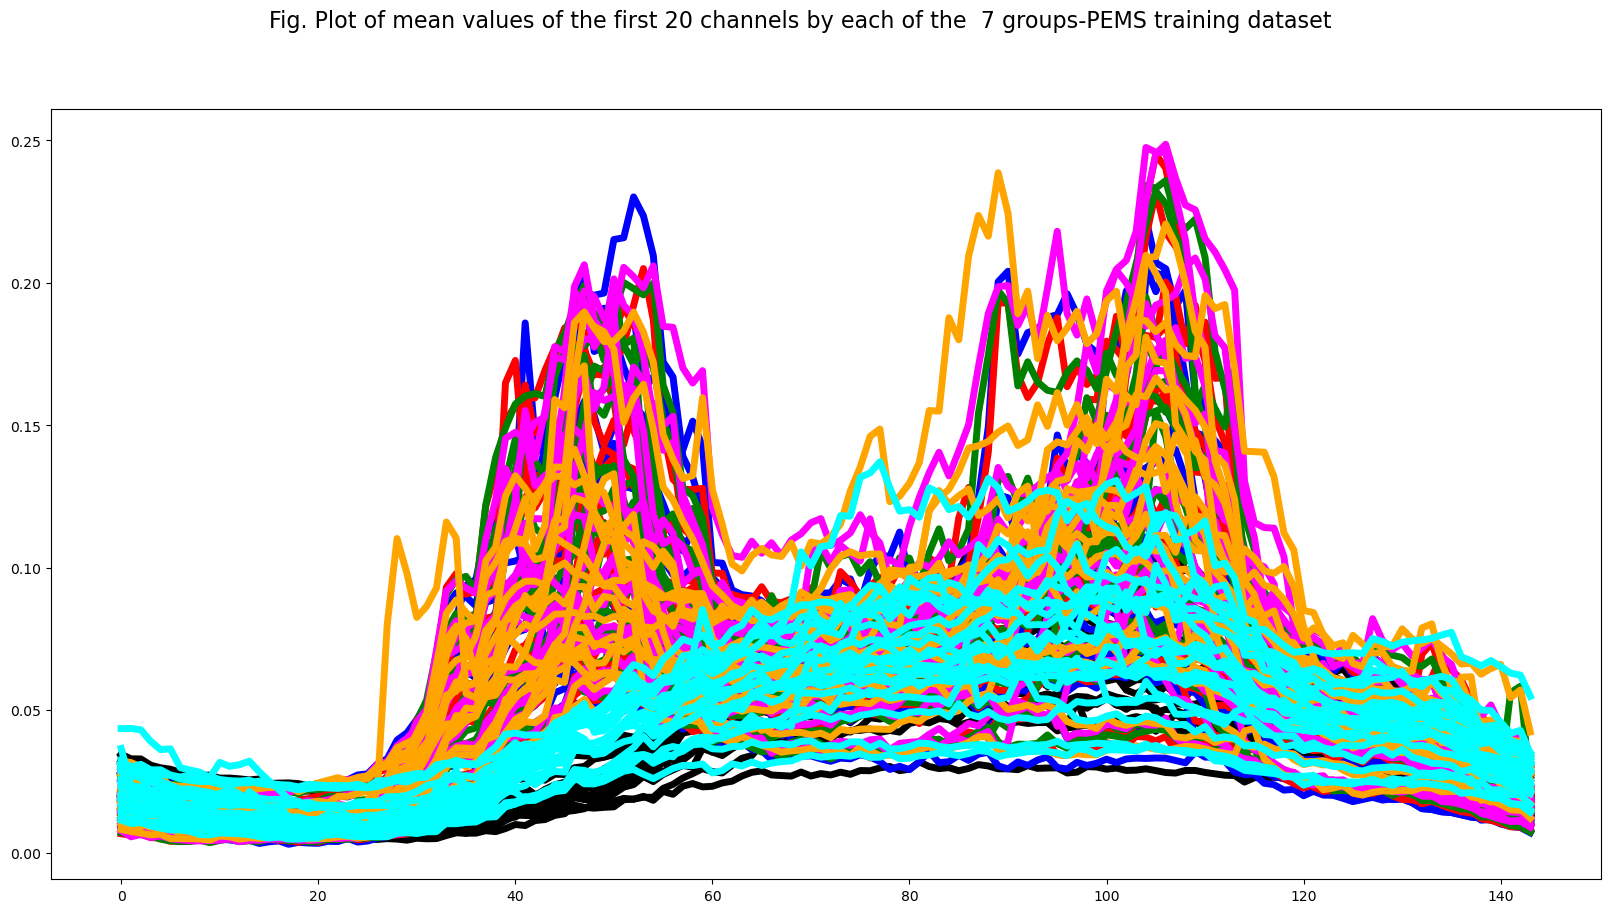

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=range(0,144,1)
fig.suptitle("Fig. Plot of mean values of the first 20 channels by each of the  7 groups-PEMS training dataset",fontsize=16)
ax.plot(ejex, Xa1.iloc[0,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,Xa1.iloc[1,ejex], color='black', lw=5,  label='G1')
ax.plot(ejex, Xa1.iloc[2,ejex], color='black', lw=5, label='G1')
ax.plot(ejex, Xa1.iloc[3,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,Xa1.iloc[4,ejex], color='black', lw=5,  label='G1')
ax.plot(ejex, Xa1.iloc[5,ejex], color='black', lw=5, label='G1')
ax.plot(ejex, Xa2.iloc[6,ejex], color='blue',lw=5, label='G2')
ax.plot(ejex, Xa1.iloc[7,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,Xa1.iloc[8,ejex], color='black', lw=5,  label='G1')
ax.plot(ejex, Xa1.iloc[9,ejex], color='black', lw=5, label='G1')
ax.plot(ejex, Xa1.iloc[10,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,Xa1.iloc[11,ejex], color='black', lw=5,  label='G1')
ax.plot(ejex, Xa1.iloc[12,ejex], color='black', lw=5, label='G1')
ax.plot(ejex, Xa1.iloc[13,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,Xa1.iloc[14,ejex], color='black', lw=5,  label='G1')
ax.plot(ejex, Xa1.iloc[15,ejex], color='black', lw=5, label='G1')
ax.plot(ejex, Xa2.iloc[16,ejex], color='blue',lw=5, label='G2')
ax.plot(ejex, Xa1.iloc[17,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,Xa1.iloc[18,ejex], color='black', lw=5,  label='G1')
ax.plot(ejex, Xa1.iloc[19,ejex], color='black', lw=5, label='G1')
ax.plot(ejex,Xa2.iloc[0,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[1,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[2,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[3,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[4,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[5,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[6,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex, Xa2.iloc[7,ejex], color='blue', lw=5, label='G2')
ax.plot(ejex,Xa2.iloc[8,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex, Xa2.iloc[9,ejex], color='blue', lw=5, label='G2')
ax.plot(ejex,Xa2.iloc[10,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[11,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[12,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[13,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[14,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[15,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[16,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex, Xa2.iloc[17,ejex], color='blue', lw=5, label='G2')
ax.plot(ejex,Xa2.iloc[18,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex, Xa2.iloc[19,ejex], color='blue', lw=5, label='G2')
ax.plot(ejex, Xa3.iloc[0,ejex], color='red',lw=5, label='G3')
ax.plot(ejex,Xa3.iloc[1,ejex], color='red', lw=5,  label='G3')
ax.plot(ejex, Xa3.iloc[2,ejex], color='red', lw=5, label='G3')
ax.plot(ejex, Xa3.iloc[3,ejex], color='red',lw=5, label='G3')
ax.plot(ejex,Xa3.iloc[4,ejex], color='red', lw=5,  label='G3')
ax.plot(ejex, Xa3.iloc[5,ejex], color='red', lw=5, label='G3')
ax.plot(ejex, Xa3.iloc[6,ejex], color='red',lw=5, label='G3')
ax.plot(ejex,Xa3.iloc[7,ejex], color='red', lw=5,  label='G3')
ax.plot(ejex, Xa3.iloc[8,ejex], color='red', lw=5, label='G3')
ax.plot(ejex,Xa3.iloc[9,ejex], color='red', lw=5,  label='G3')
ax.plot(ejex, Xa3.iloc[10,ejex], color='red',lw=5, label='G3')
ax.plot(ejex,Xa3.iloc[11,ejex], color='red', lw=5,  label='G3')
ax.plot(ejex, Xa3.iloc[12,ejex], color='red', lw=5, label='G3')
ax.plot(ejex, Xa3.iloc[13,ejex], color='red',lw=5, label='G3')
ax.plot(ejex,Xa3.iloc[14,ejex], color='red', lw=5,  label='G3')
ax.plot(ejex, Xa3.iloc[15,ejex], color='red', lw=5, label='G3')
ax.plot(ejex, Xa3.iloc[16,ejex], color='red',lw=5, label='G3')
ax.plot(ejex,Xa3.iloc[17,ejex], color='red', lw=5,  label='G3')
ax.plot(ejex, Xa3.iloc[18,ejex], color='red', lw=5, label='G3')
ax.plot(ejex,Xa3.iloc[19,ejex], color='red', lw=5,  label='G3')
ax.plot(ejex, Xa4.iloc[0,ejex], color='green',lw=5, label='G4')
ax.plot(ejex,Xa4.iloc[1,ejex], color='green', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[2,ejex], color='green', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[3,ejex], color='green',lw=5, label='G4')
ax.plot(ejex,Xa4.iloc[4,ejex], color='green', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[5,ejex], color='green', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[6,ejex], color='green',lw=5, label='G4')
ax.plot(ejex,Xa4.iloc[7,ejex], color='green', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[8,ejex], color='green', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[9,ejex], color='green', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[10,ejex], color='green',lw=5, label='G4')
ax.plot(ejex,Xa4.iloc[11,ejex], color='green', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[12,ejex], color='green', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[13,ejex], color='green',lw=5, label='G4')
ax.plot(ejex,Xa4.iloc[14,ejex], color='green', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[15,ejex], color='green', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[16,ejex], color='green',lw=5, label='G4')
ax.plot(ejex,Xa4.iloc[17,ejex], color='green', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[18,ejex], color='green', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[19,ejex], color='green', lw=5,  label='G4')
ax.plot(ejex, Xa5.iloc[0,ejex], color='magenta',lw=5, label='G5')
ax.plot(ejex,Xa5.iloc[1,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[2,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[3,ejex], color='magenta',lw=5, label='G5')
ax.plot(ejex,Xa5.iloc[4,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[5,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[6,ejex], color='magenta',lw=5, label='G5')
ax.plot(ejex,Xa5.iloc[7,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[8,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[9,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[10,ejex], color='magenta',lw=5, label='G5')
ax.plot(ejex,Xa5.iloc[11,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[12,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[13,ejex], color='magenta',lw=5, label='G5')
ax.plot(ejex,Xa5.iloc[14,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[15,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[16,ejex], color='magenta',lw=5, label='G5')
ax.plot(ejex,Xa5.iloc[17,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[18,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[19,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[0,ejex], color='orange',lw=5, label='G6')
ax.plot(ejex,Xa6.iloc[1,ejex], color='orange', lw=5,  label='G6')
ax.plot(ejex, Xa6.iloc[2,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[3,ejex], color='orange',lw=5, label='G5')
ax.plot(ejex,Xa6.iloc[4,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[5,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[6,ejex], color='orange',lw=5, label='G5')
ax.plot(ejex,Xa6.iloc[7,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[8,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[9,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[10,ejex], color='orange',lw=5, label='G5')
ax.plot(ejex,Xa6.iloc[11,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[12,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[13,ejex], color='orange',lw=5, label='G5')
ax.plot(ejex,Xa6.iloc[14,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[15,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[16,ejex], color='orange',lw=5, label='G5')
ax.plot(ejex,Xa6.iloc[17,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[18,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[19,ejex], color='orange', lw=5,  label='G6')
ax.plot(ejex, Xa7.iloc[0,ejex], color='cyan',lw=5, label='G7')
ax.plot(ejex,Xa7.iloc[1,ejex], color='cyan', lw=5,  label='G5')
ax.plot(ejex, Xa7.iloc[2,ejex], color='cyan', lw=5,  label='G5')
ax.plot(ejex, Xa7.iloc[3,ejex], color='cyan',lw=5, label='G5')
ax.plot(ejex,Xa7.iloc[4,ejex], color='cyan', lw=5,  label='G5')
ax.plot(ejex, Xa7.iloc[5,ejex], color='cyan', lw=5,  label='G5')
ax.plot(ejex, Xa7.iloc[6,ejex], color='cyan',lw=5, label='G5')
ax.plot(ejex,Xa7.iloc[7,ejex], color='cyan', lw=5,  label='G5')
ax.plot(ejex, Xa7.iloc[8,ejex], color='cyan', lw=5,  label='G5')
ax.plot(ejex, Xa7.iloc[9,ejex], color='cyan', lw=5,  label='G5')
ax.plot(ejex, Xa7.iloc[10,ejex], color='cyan',lw=5, label='G5')
ax.plot(ejex,Xa7.iloc[11,ejex], color='cyan', lw=5,  label='G5')
ax.plot(ejex, Xa7.iloc[12,ejex], color='cyan', lw=5,  label='G5')
ax.plot(ejex, Xa7.iloc[13,ejex], color='cyan',lw=5, label='G5')
ax.plot(ejex,Xa7.iloc[14,ejex], color='cyan', lw=5,  label='G5')
ax.plot(ejex, Xa7.iloc[15,ejex], color='cyan', lw=5,  label='G5')
ax.plot(ejex, Xa7.iloc[16,ejex], color='cyan',lw=5, label='G5')
ax.plot(ejex,Xa7.iloc[17,ejex], color='cyan', lw=5,  label='G5')
ax.plot(ejex, Xa7.iloc[18,ejex], color='cyan', lw=5,  label='G5')
ax.plot(ejex, Xa7.iloc[19,ejex], color='cyan', lw=5,  label='G7')
#ax.legend(loc='best', frameon=False)

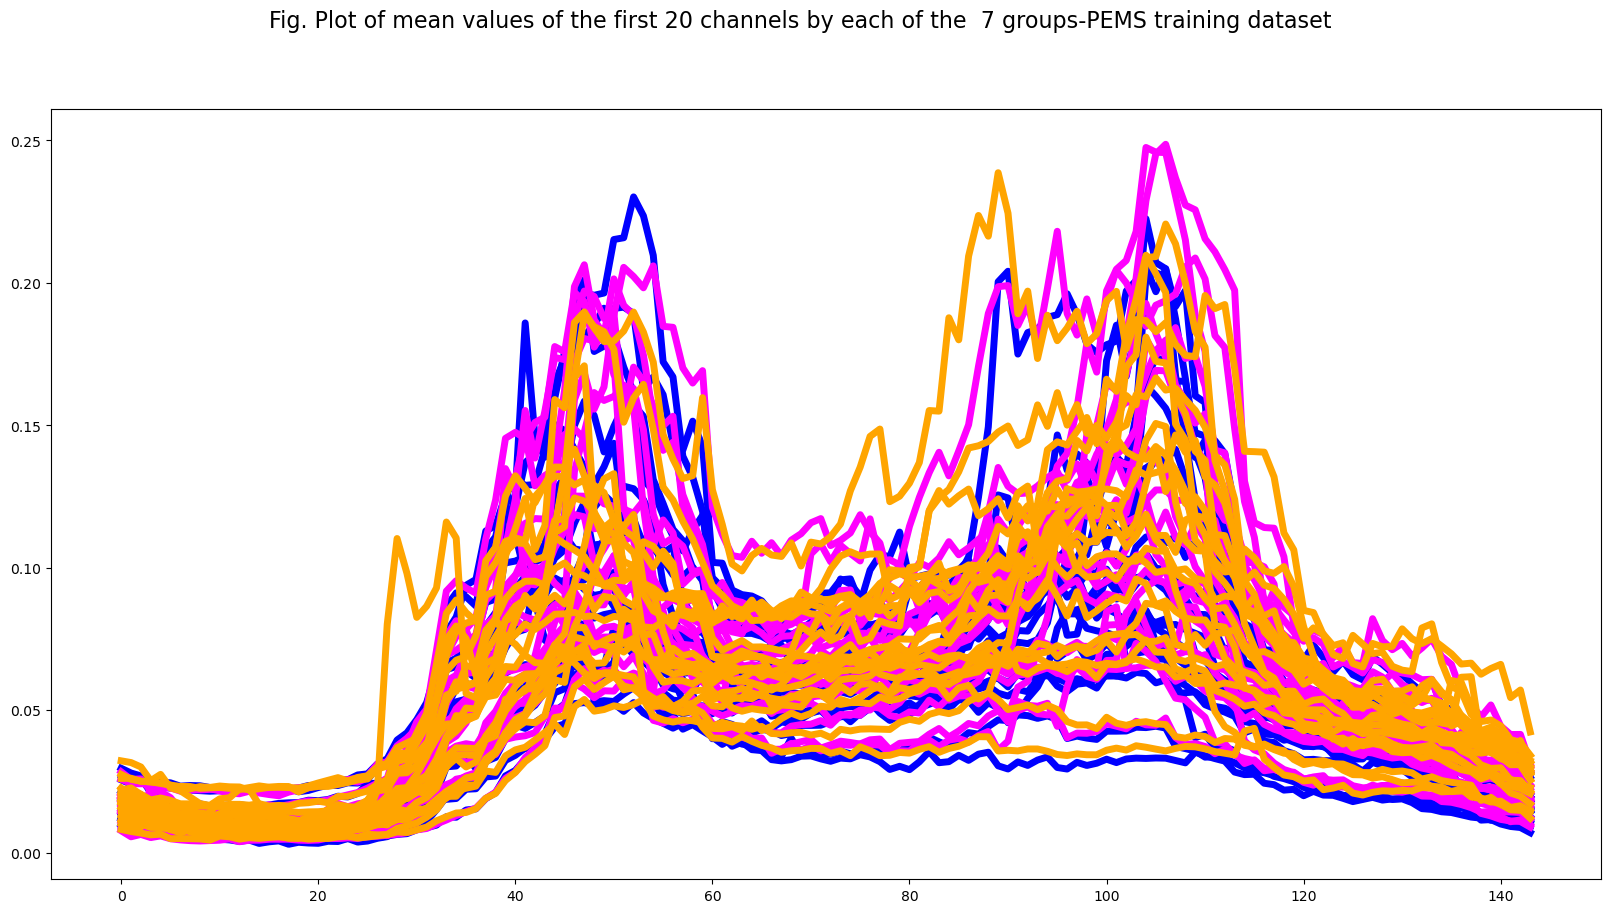

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=range(0,144,1)
fig.suptitle("Fig. Plot of mean values of the first 20 channels by each of the  7 groups-PEMS training dataset",fontsize=16)
ax.plot(ejex,Xa2.iloc[0,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[1,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[2,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[3,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[4,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[5,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[6,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex, Xa2.iloc[7,ejex], color='blue', lw=5, label='G2')
ax.plot(ejex,Xa2.iloc[8,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex, Xa2.iloc[9,ejex], color='blue', lw=5, label='G2')
ax.plot(ejex,Xa2.iloc[10,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[11,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[12,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[13,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[14,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[15,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex,Xa2.iloc[16,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex, Xa2.iloc[17,ejex], color='blue', lw=5, label='G2')
ax.plot(ejex,Xa2.iloc[18,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex, Xa2.iloc[19,ejex], color='blue', lw=5, label='G2')
ax.plot(ejex, Xa5.iloc[0,ejex], color='magenta',lw=5, label='G5')
ax.plot(ejex,Xa5.iloc[1,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[2,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[3,ejex], color='magenta',lw=5, label='G5')
ax.plot(ejex,Xa5.iloc[4,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[5,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[6,ejex], color='magenta',lw=5, label='G5')
ax.plot(ejex,Xa5.iloc[7,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[8,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[9,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[10,ejex], color='magenta',lw=5, label='G5')
ax.plot(ejex,Xa5.iloc[11,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[12,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[13,ejex], color='magenta',lw=5, label='G5')
ax.plot(ejex,Xa5.iloc[14,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[15,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[16,ejex], color='magenta',lw=5, label='G5')
ax.plot(ejex,Xa5.iloc[17,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[18,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa5.iloc[19,ejex], color='magenta', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[0,ejex], color='orange',lw=5, label='G6')
ax.plot(ejex,Xa6.iloc[1,ejex], color='orange', lw=5,  label='G6')
ax.plot(ejex, Xa6.iloc[2,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[3,ejex], color='orange',lw=5, label='G5')
ax.plot(ejex,Xa6.iloc[4,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[5,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[6,ejex], color='orange',lw=5, label='G5')
ax.plot(ejex,Xa6.iloc[7,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[8,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[9,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[10,ejex], color='orange',lw=5, label='G5')
ax.plot(ejex,Xa6.iloc[11,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[12,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[13,ejex], color='orange',lw=5, label='G5')
ax.plot(ejex,Xa6.iloc[14,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[15,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[16,ejex], color='orange',lw=5, label='G5')
ax.plot(ejex,Xa6.iloc[17,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[18,ejex], color='orange', lw=5,  label='G5')
ax.plot(ejex, Xa6.iloc[19,ejex], color='orange', lw=5,  label='G6')

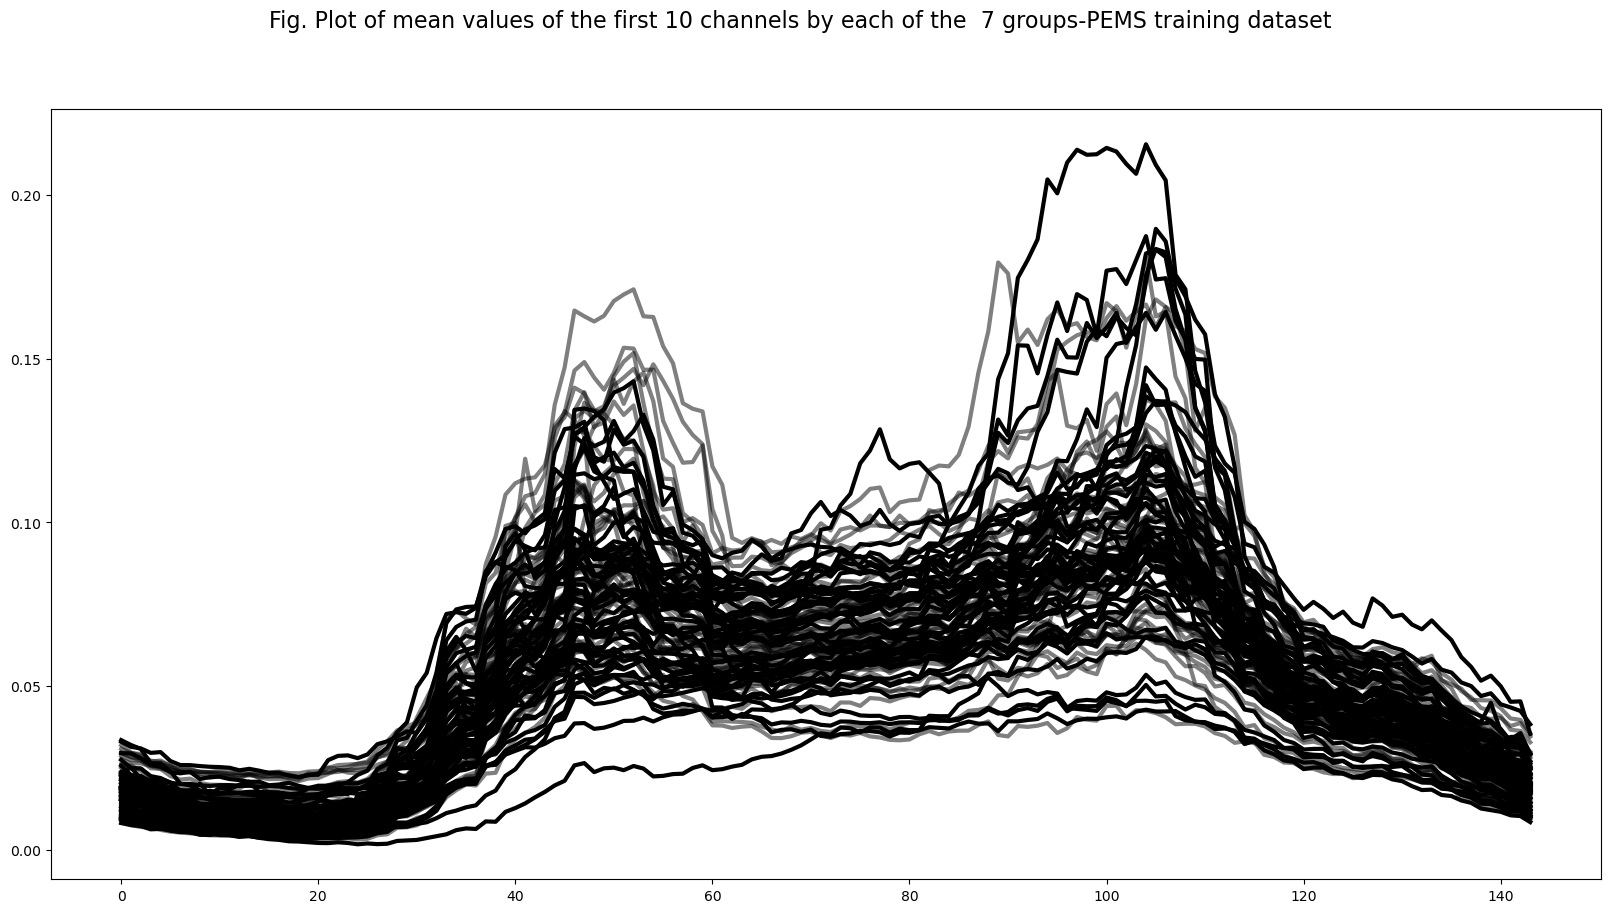

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=range(0,144,1)
fig.suptitle("Fig. Plot of mean values for first 100 channels-PEMS training dataset",fontsize=16)
fig.suptitle("Fig. Plot of mean values of the first 10 channels by each of the  7 groups-PEMS training dataset",fontsize=16)
ax.plot(ejex, Xa.iloc[0,ejex], color='black',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa.iloc[1,ejex], color='black', lw=3, label='d2')
ax.plot(ejex, Xa.iloc[2,ejex], color='black', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa.iloc[3,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[4,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[5,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[6,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[7,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[8,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa.iloc[9,ejex], color='black',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa.iloc[10,ejex], color='black', lw=3, label='d2')
ax.plot(ejex, Xa.iloc[11,ejex], color='black', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa.iloc[12,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[13,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[14,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[15,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[16,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[17,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa.iloc[18,ejex], color='black',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa.iloc[19,ejex], color='black', lw=3, label='d2')
ax.plot(ejex, Xa.iloc[20,ejex], color='black', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa.iloc[21,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[22,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[23,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[24,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[25,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[26,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa.iloc[27,ejex], color='black',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa.iloc[28,ejex], color='black', lw=3, label='d2')
ax.plot(ejex, Xa.iloc[29,ejex], color='black', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa.iloc[30,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[31,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[32,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[33,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[34,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[35,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa.iloc[36,ejex], color='black',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa.iloc[37,ejex], color='black', lw=3, label='d2')
ax.plot(ejex, Xa.iloc[38,ejex], color='black', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa.iloc[39,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[40,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[41,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[42,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[43,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[44,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa.iloc[45,ejex], color='black',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa.iloc[46,ejex], color='black', lw=3, label='d2')
ax.plot(ejex, Xa.iloc[47,ejex], color='black', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa.iloc[48,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[49,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[50,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[51,ejex], color='black',lw=3, label='G1')
ax.plot(ejex,Xa.iloc[52,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[53,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[54,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[55,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[56,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[57,ejex], color='black',lw=3, label='G1')
ax.plot(ejex,Xa.iloc[58,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[59,ejex], color='black', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa.iloc[60,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[61,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[62,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[63,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[64,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[65,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa.iloc[66,ejex], color='black',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa.iloc[67,ejex], color='black', lw=3, label='d2')
ax.plot(ejex, Xa.iloc[68,ejex], color='black', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa.iloc[69,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[70,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[71,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[72,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[73,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[74,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xa.iloc[75,ejex], color='black',lw=3, alpha=0.5, label='d1')
ax.plot(ejex,Xa.iloc[76,ejex], color='black', lw=3, label='d2')
ax.plot(ejex, Xa.iloc[77,ejex], color='black', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa.iloc[78,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[79,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[80,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[81,ejex], color='black',lw=3, label='G1')
ax.plot(ejex,Xa.iloc[82,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[83,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[84,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[85,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[86,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[87,ejex], color='black',lw=3, label='G1')
ax.plot(ejex,Xa.iloc[88,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[89,ejex], color='black', lw=3, alpha=0.5, label='d3')
ax.plot(ejex,Xa.iloc[90,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[91,ejex], color='black',lw=3, label='G1')
ax.plot(ejex,Xa.iloc[92,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[93,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[94,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[95,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[96,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[97,ejex], color='black',lw=3, label='G1')
ax.plot(ejex,Xa.iloc[98,ejex], color='black', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[99,ejex], color='black', lw=3, alpha=0.5, label='d3')

#ax.legend(loc='best', frameon=False)

In [13]:
tempotr=X.reshape(X.shape[2],-1).T
tempotr=pd.DataFrame(tempotr)

In [14]:
#Boxplots of each feature inthe groups pf the training dataset
temptr=pd.DataFrame(tempotr)
from itertools import cycle
variables= cycle(yo)
print(variables)
temptr['group'] = [next(variables) for variable in range(len(temptr))]
#Bboxplot  of features by class
#temptr.boxplot(by='group')
#temptr.groupby('group').mean()

In [15]:
#Distance between the features in the two groups of the treining
means=temptr.groupby('group').mean()
from scipy.spatial.distance import pdist, squareform

distances = pdist(means, metric='euclidean')
distances

array([0.02013686, 0.02091654, 0.01772934, 0.01781015, 0.0174329 ,
       0.02019202, 0.01752607, 0.01944542, 0.02294145, 0.02263479,
       0.02314776, 0.01846112, 0.02188732, 0.02220235, 0.02083193,
       0.01716847, 0.01937454, 0.01838379, 0.01787231, 0.01899045,
       0.01608347])

In [16]:
tempoA=X.reshape(X.shape[1],-1).T
print(tempoA.shape)
tempoA1=pd.DataFrame(tempoA)
tempoA1.var()

(257121, 144)


0      0.002715
1      0.002688
2      0.002269
3      0.002351
4      0.002674
         ...   
139    0.001874
140    0.003084
141    0.002019
142    0.003175
143    0.002320
Length: 144, dtype: float64

### Distances between groups-training data

In [17]:
#Distance between the features in the two groups of the treining
means=temptr.groupby('group').mean()
from scipy.spatial.distance import pdist, squareform

distances = pdist(means, metric='euclidean')
distances

array([0.02013686, 0.02091654, 0.01772934, 0.01781015, 0.0174329 ,
       0.02019202, 0.01752607, 0.01944542, 0.02294145, 0.02263479,
       0.02314776, 0.01846112, 0.02188732, 0.02220235, 0.02083193,
       0.01716847, 0.01937454, 0.01838379, 0.01787231, 0.01899045,
       0.01608347])

In [18]:
distances.max()

0.023147761844696288

In [19]:
distances.min()

0.016083473681340648

In [20]:
#media total training
meanTr=tempoA.mean(axis=0)
meanTr.shape

(144,)

In [21]:
tempoB=pd.DataFrame(tempoA)
from itertools import cycle
variables= cycle(yo)
print(variables)
tempoB['group'] = [next(variables) for variable in range(len(tempoB))]
#Bboxplot  of features by class
a=tempoB.groupby('group').mean()

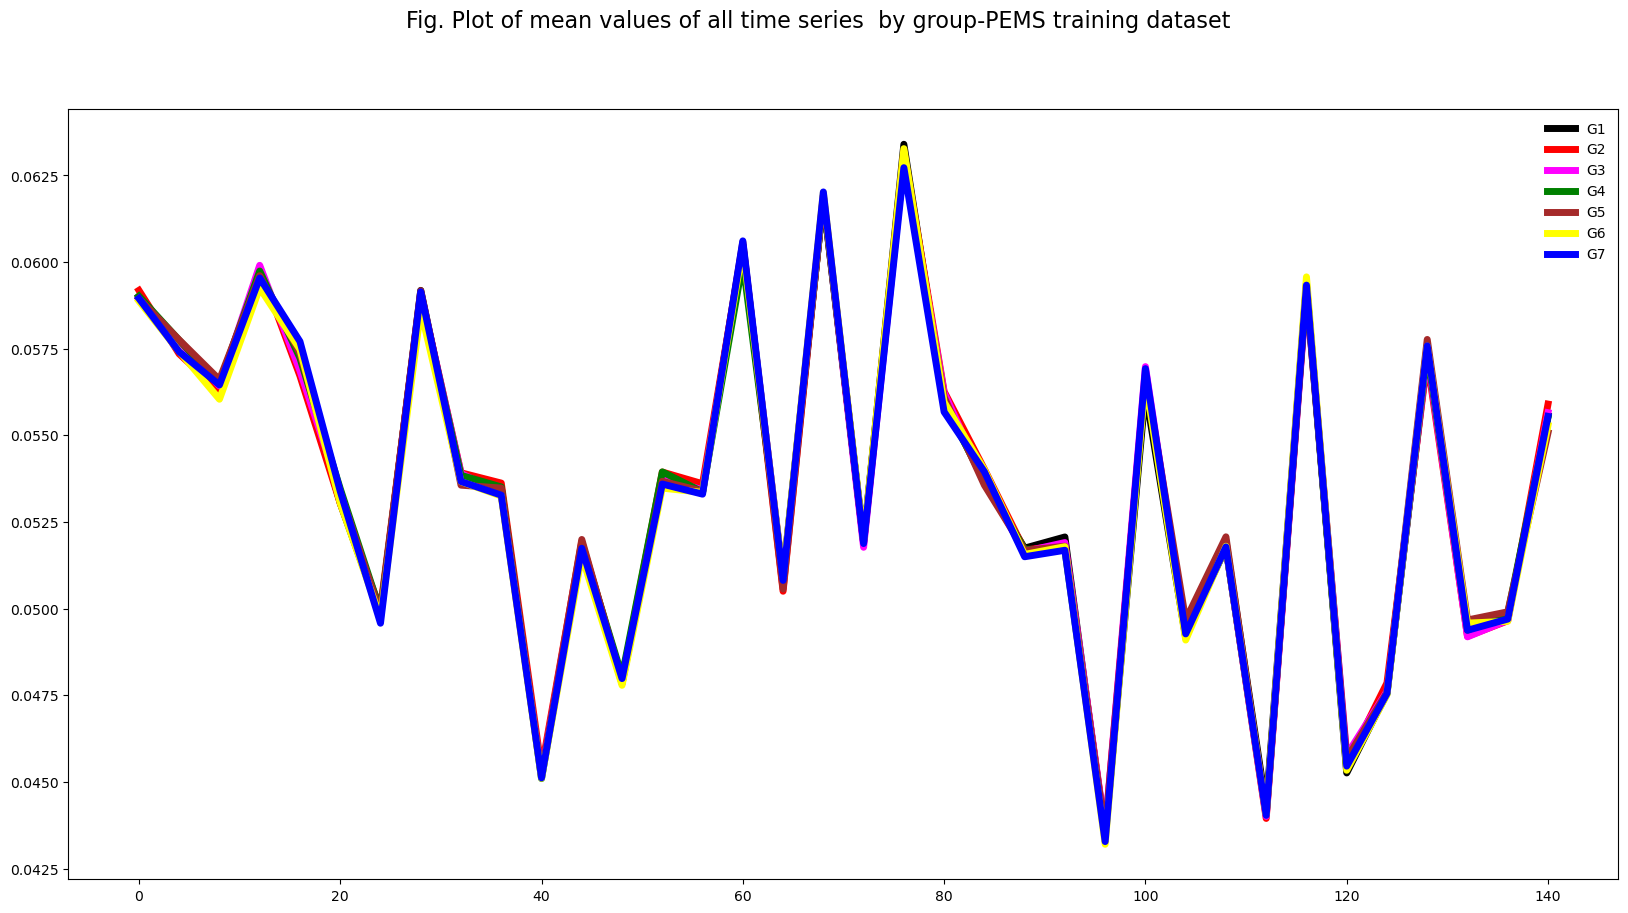

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=range(0,144,4)
fig.suptitle("Fig. Plot of mean values of all time series  by group-PEMS training dataset",fontsize=16)
ax.plot(ejex, a.iloc[0,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,a.iloc[1,ejex], color='red', lw=5, label='G2')
ax.plot(ejex, a.iloc[2,ejex], color='magenta', lw=5, label='G3')
ax.plot(ejex, a.iloc[3,ejex], color='green', lw=5,  label='G4')
ax.plot(ejex, a.iloc[4,ejex], color='brown', lw=5, label='G5')
ax.plot(ejex, a.iloc[5,ejex], color='yellow', lw=5,  label='G6')
ax.plot(ejex, a.iloc[6,ejex], color='blue', lw=5, label='G7')
ax.legend(loc='best', frameon=False)

### Feature Selection

In [37]:
#Feature selection
from sklearn.feature_selection import  mutual_info_classif, SelectPercentile, f_classif
ym=tempoB['group']
Xm=tempoB.iloc[:,0:144]
scores = mutual_info_classif(Xm,ym)
scores /= scores.max()
importance=[i for i,v in enumerate(scores) if v > .5]
len(importance)*100/144

9.027777777777779

In [24]:
selector = SelectPercentile(f_classif, percentile=30)
Xm_new=selector.fit_transform(Xm, ym)
scores = -np.log10(selector.pvalues_)
#scores /= scores.max()
#print(scores)
#critical p-value=.15
importance=[i for i,v in enumerate(scores) if v > .8239]
len(importance)*100/144

0.6944444444444444

In [25]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=.003)
Xv_new=selector.fit_transform(Xm)
Xv_new.shape

(257121, 13)

In [26]:
# loading Testing data
Xt, yt = load_data("PEMS-SF",split="Test")

 Shape of X =  (173, 963, 144)
 Shape of y =  (173,)
 New shape of X =  (173, 144, 963)
 New shape of y =  (173, 7)


In [27]:
#class size in testing
import numpy as np
np.sum(yt,axis=0)

array([30, 25, 26, 23, 22, 27, 20])

In [28]:
yto=np.argmax(yt,axis=1)
yto=np.array(yto,dtype=int)
#print(yto)

In [29]:
#Boxplot of features in the testing dataset
tempote=Xt.reshape(Xt.shape[2],-1).T
tempodfte=pd.DataFrame(tempote)
print(tempodfte.shape)
#pyplot.boxplot(tempodfte)
#pyplot.show()

(24912, 963)


In [30]:
a=np.sum(yt,axis=0)
np.max(a/Xt.shape[0])

0.17341040462427745

In [31]:
import numpy as np
Xb= np.concatenate((X, Xt),axis=0)
print(Xb.shape)

(440, 144, 963)


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tempo=X.reshape(X.shape[2],-1).T
#print(tempo.shape)
X = scaler.fit_transform(X.reshape(X.shape[2], -1)).reshape(X.shape)
Xb = scaler.fit_transform(Xb.reshape(Xb.shape[2], -1)).reshape(Xb.shape)
Xt = scaler.fit_transform(Xt.reshape(Xt.shape[2], -1)).reshape(Xt.shape)
X1 = scaler.fit_transform(tempo)
#print(X)
tempodf=pd.DataFrame(X1)
print(tempodf.shape)
#pyplot.boxplot(tempodf)
#pyplot.show()

(38448, 963)


In [33]:
tempoA=X.reshape(X.shape[1],-1).T
print(tempoA.shape)
tempoA1=pd.DataFrame(tempoA)
tempoA1.var()

(257121, 144)


0      1.205744
1      1.171175
2      0.939978
3      1.054625
4      1.195855
         ...   
139    0.839685
140    1.376403
141    0.892680
142    1.402876
143    1.042504
Length: 144, dtype: float64

In [34]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=.9)
Xv_new=selector.fit_transform(tempoA)
Xv_new.shape

(257121, 96)

In [35]:
#media total testung
meanTe=tempoA1.mean(axis=0)
meanTe.shape

(144,)

In [36]:
#Distance Training and Testsing
from scipy.spatial import distance
dst = distance.euclidean(meanTr, meanTe)
dst

1.4543226571908743